# Barabási-model in Python/numpy


In [55]:
import numpy as np
from math import floor
from numpy.random import random
import matplotlib.pyplot as plt
import time


the function named "barabasi" is a numpy implementation of the classical random graph.

In [59]:
def barabasi(m,n_step):
# parameters:
# input:
# m: how many old vertices are chosen at each step? (m>1)
# n_step: number of steps including the initial one
# output:
# edge: an array for storing the edges
# local:
# chosen: for temp storing
# i_edge: the idx of the last edge in edge

    n_edge=int((n_step-1)*m+(m*(m-1))/2)
    edge=np.zeros(2*n_edge,dtype=np.int)
    chosen=np.zeros(m,dtype=np.int)
    i_edge=0 

    # initial step, inserting a complete m-graph
    for it in np.arange(1,m):
        for jt in np.arange(it+1,m+1):
            edge[i_edge]=it
            i_edge+=1
            edge[i_edge]=jt
            i_edge+=1
    i_vertex=m

# generating the graf
    for i_step in np.arange(2,n_step+1):
# choosing the future neighbours for the new one
        i_m=0
        while i_m<m:
            v=edge[1+floor(i_edge*random())]
            it=0
            while it<i_m:
                if chosen[it]==v:
                    break
                it+=1
            
            if it>=i_m:
                chosen[i_m]=v
                i_m+=1
                
# inserting the new edges
        i_vertex+=1
        for i_m in np.arange(0,m):
            edge[i_edge]=chosen[i_m]
            i_edge+=1
            edge[i_edge]=i_vertex
            i_edge+=1

    return edge
#end function

generating the graph with parameters below:

In [62]:
st=time.time()
m=3
n_step=3000
edge=barabasi(m, n_step)
print(time.time()-st)
#write(t(edge),ncolumns = 2,'edgelist_R')

0.04372429847717285


plotting the degree distribution in loglog scale:

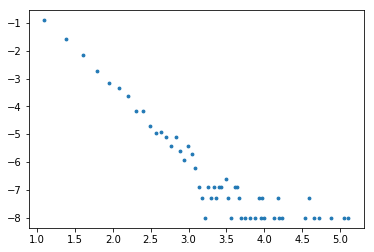

In [63]:
n_edge=int((n_step-1)*m+(m*(m-1))/2)
n_vertex=m+n_step-1
dist=np.bincount(np.bincount(edge))
X=dist.nonzero()[0]
plt.scatter(np.log(X.astype(float)),np.log(dist[X].astype(float)/n_vertex),s=8)
plt.show()